### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 8
### Due: Saturday, Apr 9th at 11.59pm CT
---

## Only one problem this week

1. Use the following code snippet to read in SDSS galaxy color data.
```
from astroML.datasets import fetch_sdss_galaxy_colors
data = fetch_sdss_galaxy_colors()
```
This is a structured numpy array. Find and print all of the column names. Using the data, create arrays of $(u-g)$, $(g-r)$, $(r-i)$, and $(i-z)$ colors. Also create arrays of redshift and the spectral class. How many regular galaxies and how many quasars are in this sample?


2. Make a scatter plot of $(u-g)$ versus $(g-r)$, color coding by galaxy or quasar class. The plot should include appropriate axis labels and a legend. Set `xlim` between -0.5 and 2.5, and `ylim` between -0.5 and 1.5.


3. Stack all colors and the redshift into a data matrix, $X$. Create a target label array that has $0$ for a regular galaxy and $1$ for a quasar. Perform a train-test split, taking $20\%$ of the data for testing.


4. Create a compact `for` loop that iterates over the fitting of a Gaussian Naive Bayes classification algorithm to successively more features of the data. Within the loop, compute and plot an ROC curve. The end result should be a plot showing ROC curves for GNB classification with more and more features of the data, with appropriate axis labels and a legend. Use `xlim` between 0 and 0.01. Which feature seems to make the classification trivially easy? *Note: `predict_proba` returns an array with as many columns as classes. You've labeled quasars as $1$, so for the ROC curve you must make sure to access the relevant quasar probability-- you can find this by accessing the **classes_** attribute of the estimator.*


5. Repeat (4) for Quadratic Discriminant Analysis. 


6. Let's try classification with GMM Bayes. Restrict the training and testing to be just on the $4$ colors. Iterate now over number of components in the GMM Bayes fit up to $10$, plotting ROC curves for all, and find the number of components that gives the best performance.


7. Repeat (6) for $K$-nearest neighbor classification, looping over number of neighbors between 5 and 100 in steps of 10. Find the number that gives the best performance. 


8. Repeat (6) for Decision Tree classification, looping over the maximum tree depth between 1 and 10. Find the number that gives the best performance. 


9. Finally, plot the ROC curves for GNB, QDA, and the best-performing GMMBayes, KNN, and DT classification algorithms, all using just the 4 colors. What is the overall best-performing classifier? 


10. Make a 2-panel plot, showing in the left panel the color-coded training data in $(u-g)$ versus $(g-r)$ (similar to item 2 above), and in the right panel the same features of the testing data color coded by their predicted class from the tuned best-performing classifier. 

In [251]:
#1) Use the following code snippet to read in SDSS galaxy color data.

from astroML.datasets import fetch_sdss_galaxy_colors
import numpy as np

#Reading in SDSS data
data = np.load('../../../../coursework/homeworks/hw_data/hw8_data_1.npy') #reading data
#print(np.shape(data))

#This is a structured numpy array. Find and print all of the column names. Using the data, create arrays of 
#(𝑢−𝑔), (𝑔−𝑟), (𝑟−𝑖), and (𝑖−𝑧) colors. Also create arrays of redshift and the spectral class. How many regular 
#galaxies and how many quasars are in this sample?

#Printing data column names
print(data.dtype.names)

#Arrays of bands
u = data['u']
g = data['g']
r = data['r']
i = data['i']
z = data['z']

#Array of redshift & errors, and special class
QorG = data['specClass']
red = data['redshift']
red_err = data['redshift_err']

#Array of colors
u_g = u - g
g_r = g - r
r_i = r - i
i_z = i - z

#index for galaxies and quasars
qso_id = np.where(QorG == 'QSO')
qso_id = qso_id[0]
print(np.shape(qso_id))
gal_id = np.where(QorG == 'GALAXY')
gal_id = gal_id[0]

print(qso_id)
print('number of quasars =',len(data[qso_id]))
print('number of galaxies =',len(data[gal_id]))

#data arrays for galaxies and quasars
gals = data[gal_id] #data for galaxies
qsos = data[qso_id] #data for quasars

#Making array of all objects of either quasars or galaxies
new_QorG = np.zeros_like(QorG)
new_QorG[qso_id] = QorG[qso_id]
new_QorG[gal_id] = QorG[gal_id]
print(np.shape(new_QorG))
print(new_QorG)

#Making y label array of 0s and 1s corresponding to galaxy = 0 and quasar = 1
y = []

for i in range(len(new_QorG)):
    if new_QorG[i] == 'QSO':
        y.append(1)
    if new_QorG[i] == 'GALAXY':
        y.append(0)

#Making sure it's the right shape and length
y = np.array(y)
print(y)
print(np.shape(y))
aaa = np.where(y==1)[0]
print(len(aaa))

('u', 'g', 'r', 'i', 'z', 'specClass', 'redshift', 'redshift_err')
(7192,)
[    0     6     7 ... 49997 49998 49999]
number of quasars = 7192
number of galaxies = 42808
(50000,)
['QSO' 'GALAXY' 'GALAXY' ... 'QSO' 'QSO' 'QSO']
[1 0 0 ... 1 1 1]
(50000,)
7192


SRT: Making your target label array this way is fine, but could be time consuming. Masking is more efficient code.

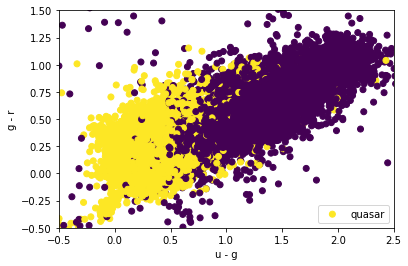

In [249]:
#2) Make a scatter plot of (𝑢−𝑔) versus (𝑔−𝑟), color coding by galaxy or quasar class. The plot should include 
#appropriate axis labels and a legend. Set xlim between -0.5 and 2.5, and ylim between -0.5 and 1.5.

import matplotlib.pyplot as plt

plt.scatter(u_g,g_r,c=y,label='quasar')
plt.xlim(-0.5,2.5)
plt.ylim(-0.5,1.5)
plt.ylabel('g - r')
plt.xlabel('u - g')
plt.legend()

SRT: No legend label for galaxies? -1

In [209]:
#3) Stack all colors and the redshift into a data matrix, 𝑋. Create a target label array that has 0 for a 
#regular galaxy and 1 for a quasar. Perform a train-test split, taking 20% of the data for testing.

from sklearn.model_selection import train_test_split

#Matrix of all colors and redshift
X = np.stack ((u_g, g_r, r_i, i_z, red))
X = np.transpose(X) #making it in a shape that sklearn can use

#Train-test split -> test size = 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(np.shape(y_test)) 

(10000,)
[1 0 0 0 0]


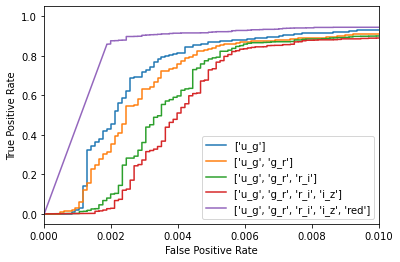

In [217]:
#4) Create a compact for loop that iterates over the fitting of a Gaussian Naive Bayes classification algorithm 
#to successively more features of the data. Within the loop, compute and plot an ROC curve. The end result 
#should be a plot showing ROC curves for GNB classification with more and more features of the data, with 
#appropriate axis labels and a legend. Use xlim between 0 and 0.01. Which feature seems to make the 
#classification trivially easy? Note: predict_proba returns an array with as many columns as classes. You've 
#labeled quasars as 1, so for the ROC curve you must make sure to access the relevant quasar probability-- you 
#can find this by accessing the classes_ attribute of the estimator.

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve

y_prob = []
features = ['u_g', 'g_r', 'r_i', 'i_z', 'red']

for i in range(1,6):
    gnb = GaussianNB()
    gnb.fit(X_train[:, :i],y_train)
    y_prob=gnb.predict_proba(X_test[:, :i])[:,1]
    fpr, tpr, thresh = roc_curve(y_test, y_prob)
    plt.plot(fpr,tpr,label=features[:i])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.xlim(0,0.01) 
    plt.legend() #adding redshift makes the classification easier

SRT: Good!

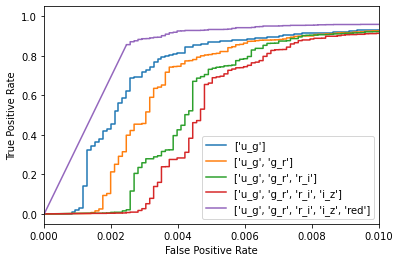

In [218]:
#5) Repeat (4) for Quadratic Discriminant Analysis.

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

for i in range(1,6):
    qda = QDA()
    qda.fit(X_train[:, :i],y_train)
    y_prob2=qda.predict_proba(X_test[:, :i])[:,1]
    fpr2, tpr2, thresh2 = roc_curve(y_test, y_prob2)
    plt.plot(fpr2,tpr2,label=features[:i])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.xlim(0,0.01) 
    plt.legend() 

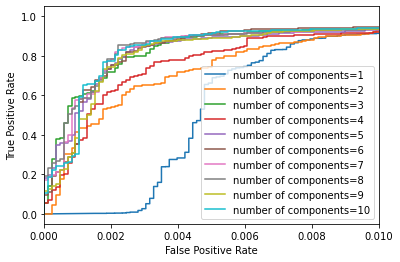

In [231]:
#6) Let's try classification with GMM Bayes. Restrict the training and testing to be just on the 4 colors. 
#Iterate now over number of components in the GMM Bayes fit up to 10, plotting ROC curves for all, and find the 
#number of components that gives the best performance.

from astroML.classification import GMMBayes

for i in range(10):
    gmmb = GMMBayes(i+1)
    gmmb.fit(X_train[:, :4],y_train) #restricting on colors (excluding redshift)
    y_prob3=gmmb.predict_proba(X_test[:, :4])[:,1]
    fpr3, tpr3, thresh3 = roc_curve(y_test, y_prob3)
    plt.plot(fpr3,tpr3,label='number of components='+str(i+1))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.xlim(0,0.01)  
    plt.legend()

SRT: I don't see any calculation of what the best number of components is. It requires calculating the area under the ROC curve. -2

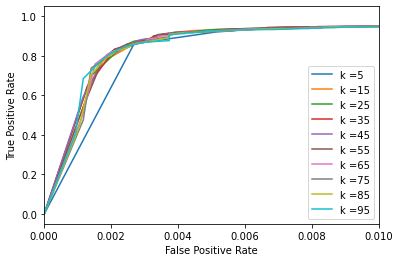

In [238]:
#7) Repeat (6) for 𝐾-nearest neighbor classification, looping over number of neighbors between 5 and 100 in 
#steps of 10. Find the number that gives the best performance.

from sklearn.neighbors import KNeighborsClassifier

ks = np.arange(5,100,10)

for i in ks:
    knc = KNeighborsClassifier(i)
    knc.fit(X_train[:, :4],y_train)
    y_prob4=knc.predict_proba(X_test[:, :4])[:,1]
    fpr4, tpr4, thresh4 = roc_curve(y_test, y_prob4)
    plt.plot(fpr4,tpr4,label='k ='+str(i))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.xlim(0,0.01)
    plt.legend()

SRT: Again, there's no statement on the best number of neighbors to use here. -1

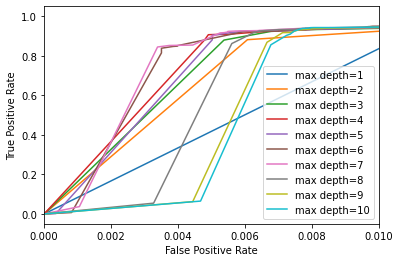

In [240]:
#8) Repeat (6) for Decision Tree classification, looping over the maximum tree depth between 1 and 10. Find the 
#number that gives the best performance.

from sklearn.tree import DecisionTreeClassifier

for i in range(1,11):
    dtree = DecisionTreeClassifier(max_depth=i)
    dtree.fit(X_train[:, :4],y_train)
    y_prob5=dtree.predict_proba(X_test[:, :4])[:,1]
    fpr5, tpr5, thresh5 = roc_curve(y_test, y_prob5)
    plt.plot(fpr5,tpr5,label='max depth='+str(i))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.xlim(0,0.01)
    plt.legend()

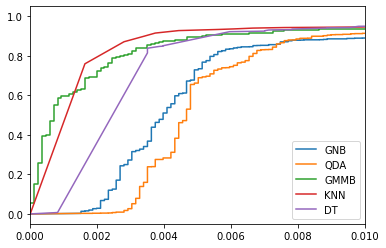

In [241]:
#9) Finally, plot the ROC curves for GNB, QDA, and the best-performing GMMBayes, KNN, and DT classification 
#algorithms, all using just the 4 colors. What is the overall best-performing classifier?

## GNB
gnb = GaussianNB()
gnb.fit(X_train[:, :4],y_train)
y_prob=gnb.predict_proba(X_test[:, :4])[:,1]
fpr, tpr, thresh = roc_curve(y_test, y_prob)

## QDA
qda = QDA()
qda.fit(X_train[:, :4],y_train)
y_prob2=qda.predict_proba(X_test[:, :4])[:,1]
fpr2, tpr2, thresh2 = roc_curve(y_test, y_prob2)

## GMM BAYES

gmmb = GMMBayes(3) #picked 3 for its fit and low complexity
gmmb.fit(X_train[:, :4],y_train)
y_prob3=gmmb.predict_proba(X_test[:, :4])[:,1]
fpr3, tpr3, thresh3 = roc_curve(y_test, y_prob3)

## KNN

knc = KNeighborsClassifier(15) #picked 15 for its fit and lower complexity
knc.fit(X_train[:, :4],y_train)
y_prob4=knc.predict_proba(X_test[:, :4])[:,1]
fpr4, tpr4, thresh4 = roc_curve(y_test, y_prob4)

## DT

dtree = DecisionTreeClassifier(max_depth=6) #picked 6 for its fit and lower complexity
dtree.fit(X_train[:, :4],y_train)
y_prob5=dtree.predict_proba(X_test[:, :4])[:,1]
fpr5, tpr5, thresh5 = roc_curve(y_test, y_prob5)

###################################################################################################

plt.plot(fpr,tpr,label='GNB')
plt.plot(fpr2,tpr2,label='QDA')
plt.plot(fpr3,tpr3,label='GMMB')
plt.plot(fpr4,tpr4,label='KNN')
plt.plot(fpr5,tpr5,label='DT')
plt.xlim(0,0.01)
plt.legend()

#KNN seems to be the best classifier!

SRT: Good, and I can see some statements of how you chose the parameters of each classifier. But a more quantitative approach to choosing those is needed in general.

(-0.5, 1.5)

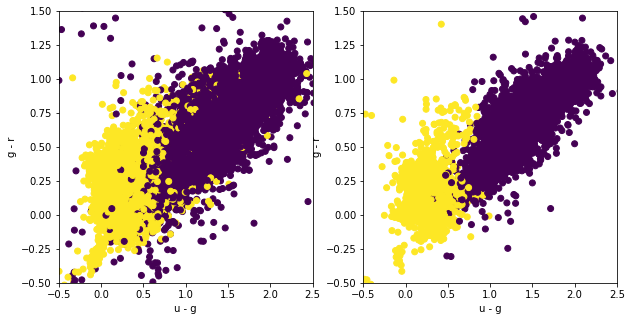

In [247]:
#10) Make a 2-panel plot, showing in the left panel the color-coded training data in (𝑢−𝑔) versus (𝑔−𝑟) (similar
#to item 2 above), and in the right panel the same features of the testing data color coded by their predicted 
#class from the tuned best-performing classifier.

fig,axes = plt.subplots(1,2,figsize=(10,5))

#Panel 1 of training data
axes[0].scatter(X_train[:,0],X_train[:,1],c=y_train)
axes[0].set_xlabel('u - g')
axes[0].set_ylabel('g - r')
axes[0].set_xlim(-0.5,2.5)
axes[0].set_ylim(-0.5,1.5)

y_pred = knc.predict(X_test[:, :4]) #y predicted using KNN classifier 

#Panel 2 of testing data using KNN
axes[1].scatter(X_test[:,0],X_test[:,1],c=y_pred)
axes[1].set_xlabel('u - g')
axes[1].set_ylabel('g - r')
axes[1].set_xlim(-0.5,2.5)
axes[1].set_ylim(-0.5,1.5)

SRT: Missing legend! -1